In [5]:
import pandas as pd
import stylia

df = pd.read_csv("chemical_gene_pairs_prediction_output_focus_with_variant_aggregates_top50_filter_llm_top10.csv")

In [14]:
chemicals = list(df["chemical"].unique())
cap2name = dict((c.capitalize(), c) for c in chemicals)
chemicals = sorted([c.capitalize() for c in chemicals])

In [57]:
df.columns

Index(['inchikey', 'cid', 'chemical', 'uniprot_ac', 'gene', 'gid',
       'chemical_in_pgkb', 'gene_in_pgkb', 'chemical_of_interest', 'adme_gene',
       'total_variants', 'intron_variants', 'missense_variants',
       'other_variants', 'afr_abundant_variants',
       'afr_abundant_intron_variants', 'afr_abundant_missense_variants',
       'afr_abundant_other_variants', 'afr_specific_variants',
       'afr_specific_intron_variants', 'afr_specific_missense_variants',
       'afr_specific_other_variants',
       'afr_specific_missense_variants_mutations', 'train_set', 'train_set_pk',
       'train_set_pk_adme', 'y_hat_all_outcomes_all_genes',
       'support_all_outcomes_all_genes', 'y_hat_only_pk_all_genes',
       'support_only_pk_all_genes', 'y_hat_only_pk_only_adme_genes',
       'support_only_pk_only_adme_genes',
       'y_hat_all_outcomes_all_genes_zscore', 'y_hat_only_pk_all_genes_zscore',
       'y_hat_only_pk_only_adme_genes_zscore', 'consensus_zscore', 'llm_rank',
       'llm_e

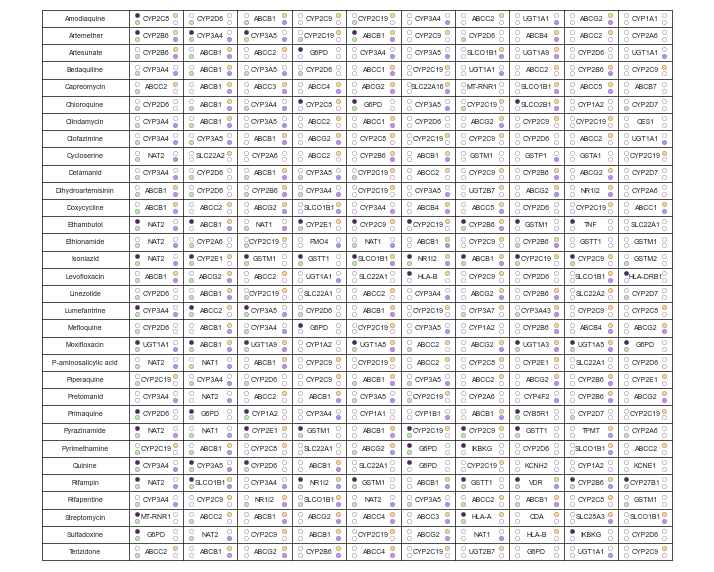

In [100]:
import numpy as np

fig, axs = stylia.create_figure(1, 1, width=stylia.TWO_COLUMNS_WIDTH, height=stylia.TWO_COLUMNS_WIDTH*0.8)
ax = axs.next()

green = "#BEE6B4"
orange = "#FAA08C"
yellow = "#FAD782"
plum = "#50285A"
gray = "#D2D2D0"
purple = "#AA96FA"

for i in range(len(chemicals)):
    ax.text(-0.3, i, chemicals[i], ha="center", va="center")
    df_ = df[df["chemical"] == cap2name[chemicals[i]]].sort_values(by="llm_rank", ascending=True).head(10)
    genes = list(df_["gene"])
    in_pgkb = []
    for x in df_[['train_set', 'train_set_pk', 'train_set_pk_adme']].sum(axis=1).tolist():
        if x == 0:
            in_pgkb += [0]
        else:
            in_pgkb += [1]
    zscores = np.clip(list(df_["consensus_zscore"]), 0, 5)
    afr_a = df_["afr_abundant_variants"].tolist()
    afr_s = df_["afr_specific_variants"].tolist()
    for j, g in enumerate(genes):
        if in_pgkb[j] == 1:
            ax.scatter(j+0.65, i-0.2, color=plum, edgecolor=plum, linewidth=0.2)
        else:
            ax.scatter(j+0.65, i-0.2, color="white", edgecolor=plum, linewidth=0.2)
        if zscores[j] > 1.95:
            ax.scatter(j+0.65, i+0.2, color=green, edgecolor=plum, linewidth=0.2)
        else:
            ax.scatter(j+0.65, i+0.2, color="white", edgecolor=plum, linewidth=0.2)
        if afr_a[j] >= 50:
            ax.scatter(j+1.35, i-0.2, color=yellow, edgecolor=plum, linewidth=0.2)
        else:
            ax.scatter(j+1.35, i-0.2, color="white", edgecolor=plum, linewidth=0.2)
        if afr_s[j] > 0:
            ax.scatter(j+1.35, i+0.2, color=purple, edgecolor=plum, linewidth=0.2)
        else:
            ax.scatter(j+1.35, i+0.2, color="white", edgecolor=plum, linewidth=0.2)
        ax.text(j+1, i, g, ha="center", va="center")
        
for i in range(len(chemicals)+1):
    ax.plot([-1.1, len(genes)+0.5], [i-0.5, i-0.5], color="black", linewidth=0.5)

for j in range(len(genes)+1):
    ax.plot([j+0.5, j+0.5], [-0.5, len(chemicals)-0.5], color="black", linewidth=0.5)

ax.plot([-1.1, -1.1], [-0.5, len(chemicals)-0.5], color="black", linewidth=0.5)

ax.set_ylim(len(chemicals)-0.4, -0.5)
ax.set_axis_off()
stylia.label(ax, title="", xlabel="", ylabel="")

stylia.save_figure("top10_genes_per_chemical.png")